In [220]:
import csv
import requests
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import datetime

plt.close('all')

In [221]:
CSV_URL = 'https://covidtracking.com/api/v1/states/daily.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)
    
    download

In [222]:
    decoded_content = download.content.decode('utf-8')

In [223]:
    #cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    cr = pd.read_csv(StringIO(decoded_content))
    df = pd.DataFrame(cr)   

In [224]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200703,AK,1063.0,119145.0,NaN,25.0,NaN,NaN,NaN,3.0,...,120208,1,0,fab1145c346d70ae703d92bac3676bff80ea5b24,0,0,0,0,0,NaN
1,20200703,AL,41865.0,388766.0,NaN,812.0,2883.0,NaN,838.0,NaN,...,430631,21,48,006e67beae01e0951e200fa82656c58a1c14cd70,0,0,0,0,0,NaN
2,20200703,AR,22622.0,308615.0,NaN,285.0,1517.0,NaN,NaN,70.0,...,331237,2,40,763acfae6de0f8e0286ba20d9bc32cb65140d0d0,0,0,0,0,0,NaN
3,20200703,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,...,696,0,0,58e291468f971e8a0ec0c5bfa8d56fc8e202a69e,0,0,0,0,0,NaN
4,20200703,AZ,91858.0,486523.0,NaN,3013.0,5018.0,741.0,NaN,489.0,...,578381,31,102,6f8c2473baf5cfc6b187c3a5425c301a4d645524,0,0,0,0,0,NaN


In [225]:
date = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

In [226]:
df3 = pd.DataFrame({'date':date, 'state':df['state'], 'positiveIncrease':df['positiveIncrease']})

In [450]:
stateNames = ['FL', 'GA', 'SC', 'LA', 'AL','MI', 'WA', 'CA']
dfstates = []

In [451]:
for name in stateNames:
    sel = df3[(df3['state']==name)]
    sel.index=sel['date']
    dfstates.insert(0, sel)

s = 'positiveIncrease'
dfgroup = pd.DataFrame()
#dfgroup['date'] = dfstates[0]['date']

for d in dfstates:
    dfgroup[d['state'][0]] = d[s]

dfgroup.head()

,CA,WA,MI,AL,LA,SC,GA,FL
date,,,,,,,,
2020-07-03,8040,716,497,1754.0,1728.0,1831,2784,9488
2020-07-02,7538,611,589,1149.0,1383.0,1782,3472,10109
2020-07-01,9740,571,361,917.0,2083.0,1520,2946,6563
2020-06-30,6367,501,505,870.0,1014.0,1755,1874,6093
2020-06-29,5307,348,277,1734.0,845.0,1324,2207,5266


In [452]:
nrows = dfgroup.shape[0]
nrows

122

In [453]:
ncols = dfgroup.shape[1]
ncols

8

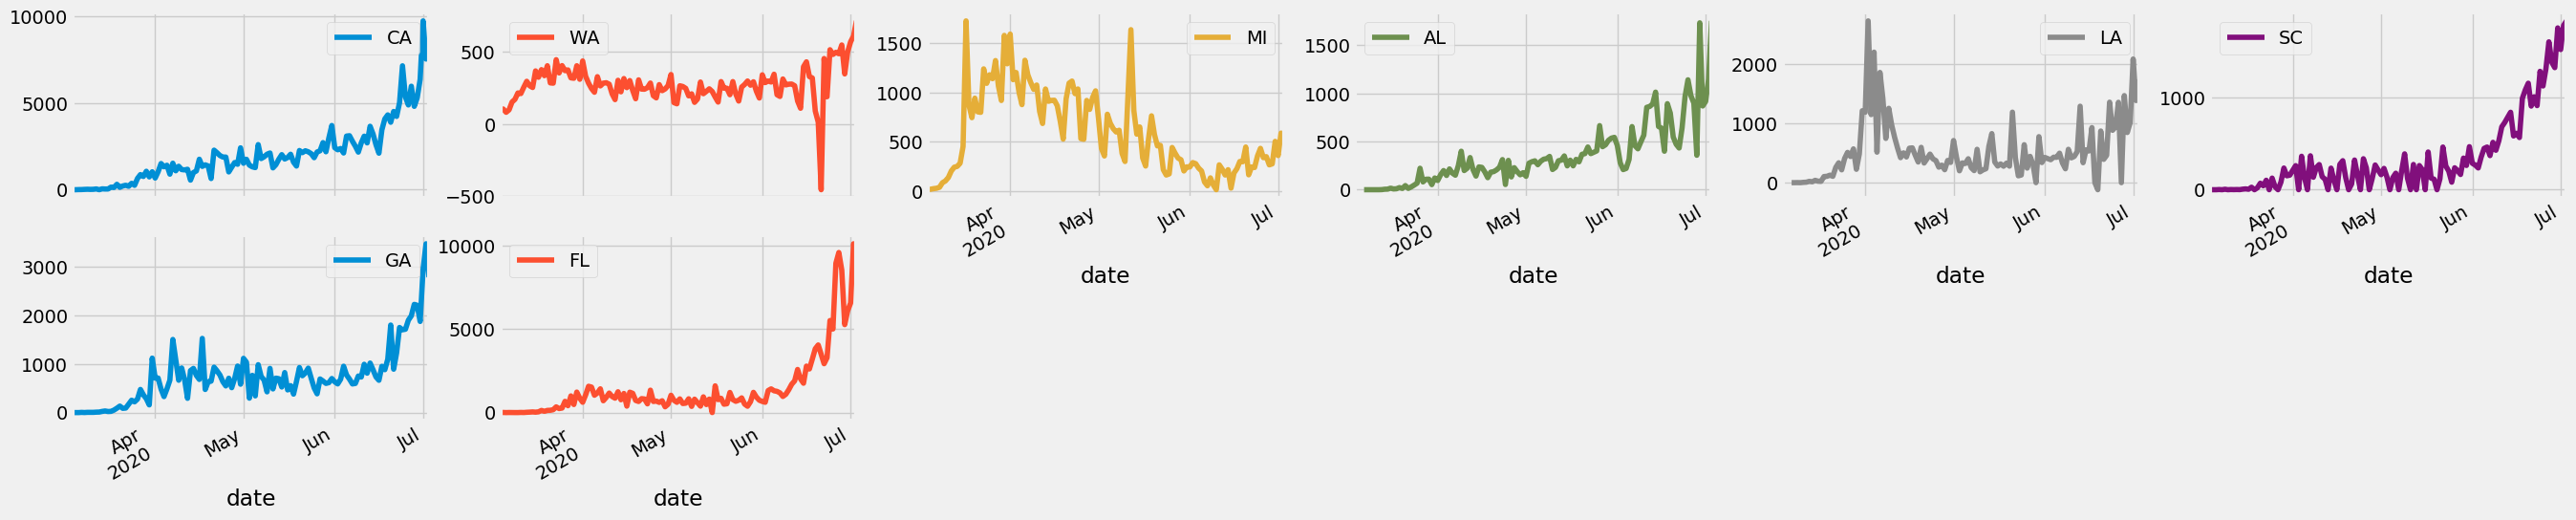

In [454]:
#fig = plt.figure();
plt.style.use('fivethirtyeight')
plot = dfgroup.plot(subplots=True, layout=(6,6), figsize=(30,20), sharex=True, sharey=False)



AttributeError: 'numpy.ndarray' object has no attribute 'plot'

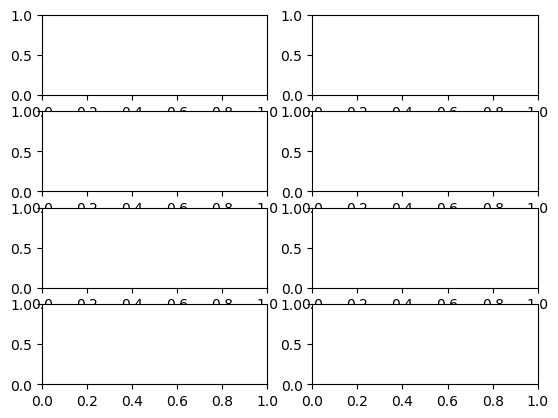

In [460]:
plt.style.use('default')
fig, ax = plt.subplots(int(ncols/2), ncols=2)
for d in range(int(ncols/2)):
    ax[d].plot(dfgroup.iloc[0:, d])
    ax[d].set_xlabel('date')
    ax[d].grid(False)
    ax[d].set_xticklabels('')
    ax[d].set_yticklabels('')
    ax[d].set_title(dfgroup.columns[d])
